<a href="https://colab.research.google.com/github/whatalnk/Gasyori100knockColab/blob/master/notebooks/Question_11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !mkdir -p "drive/My Drive/Gasyori100knock/Question_11_20"

In [2]:
%cd "drive/My Drive/Gasyori100knock/Question_11_20"

/content/drive/My Drive/Gasyori100knock/Question_11_20


In [0]:
# !wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori.jpg

In [0]:
# !wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg

In [0]:
# !wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_noise.jpg

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

## Q11 平滑化フィルタ

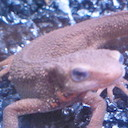

In [0]:
img = cv2.imread("imori.jpg")
cv2_imshow(img)

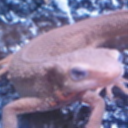

In [0]:
def smoothing_filter(img, size=3):
  H, W, C = img.shape
  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
  out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

  for y in range(H):
    for x in range(W):
      for c in range(C):
        out[y + pad, x + pad, c] = np.mean(img[y:y+size, x:x+size, c])
  
  out = np.clip(out, 0, 255)

  return out[pad:pad+H, pad:pad+W].astype(np.uint8)

out = smoothing_filter(img)
cv2_imshow(out)

## Q12 モーションフィルタ

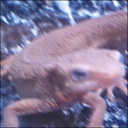

In [0]:
def motion_filter(img, size=3):
  H, W, C = img.shape

  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

  K = np.zeros((size, size), dtype=np.float)
  for x in range(-pad, -pad + size):
    for y in range(-pad, -pad + size):
      if x == y:
        K[y + pad, x + pad] = 1

  tmp = out.copy()

  for y in range(H):
    for x in range(W):
      for c in range(C):
        out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + size, x: x + size, c]) / size

  out = np.clip(out, 0, 255)
  out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

  return out
  
out = motion_filter(img)
cv2_imshow(out)

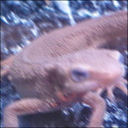

In [0]:
def motion_filter(img, K_size=3):
    H, W, C = img.shape

    # Kernel
    K = np.diag( [1] * K_size ).astype(np.float)
    K /= K_size

    # zero padding
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
    tmp = out.copy()

    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out
out = motion_filter(img)
cv2_imshow(out)

## Q13 MAX - MIN フィルタ

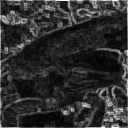

In [0]:
def max_min_filter(img, size):
  H, W= img.shape

  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
  tmp = out.copy()

  for y in range(H):
    for x in range(W):
      out[pad + y, pad + x] = np.max(tmp[y: y + size, x: x + size]) - np.min(tmp[y: y + size, x: x + size])

  out = np.clip(out, 0, 255)
  out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

  return out

im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = max_min_filter(im_gray, 3)
cv2_imshow(out)

## Q14 微分フィルタ

Vertical


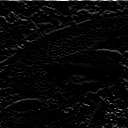

Horizontal


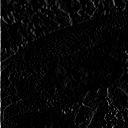

In [0]:
def differential_filter(img, size):
  H, W= img.shape

  pad = size // 2
  out_v = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
  out_v[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
  out_h = out_v.copy()

  K_v = [[0, -1, 0], [0, 1, 0], [0, 0, 0]]
  K_h = [[0, 0, 0], [-1, 1, 0], [0, 0, 0]]

  tmp= out_v.copy()

  for y in range(H):
    for x in range(W):
      out_v[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K_v).sum()
      out_h[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K_h).sum()

  out_v = np.clip(out_v, 0, 255)
  out_h = np.clip(out_h, 0, 255)

  out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
  out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)

  return (out_v, out_h)

img = cv2.imread("imori.jpg")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out_v, out_h = differential_filter(im_gray, 3)
print("Vertical")
cv2_imshow(out_v)
print("Horizontal")
cv2_imshow(out_h)

## Q15 Sobel フィルタ

Vertical


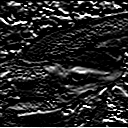

Horizontal


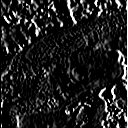

In [0]:
def sobel_filter(img, size):
  H, W = img.shape

  pad = size // 2
  out_v = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
  out_v[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
  out_h = out_v.copy()

  K_v = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
  K_h = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]

  tmp= out_v.copy()

  for y in range(H):
    for x in range(W):
      out_v[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K_v).sum()
      out_h[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K_h).sum()

  out_v = np.clip(out_v, 0, 255)
  out_h = np.clip(out_h, 0, 255)

  out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
  out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)

  return (out_v, out_h)

img = cv2.imread("imori.jpg")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out_v, out_h = sobel_filter(im_gray, 3)
print("Vertical")
cv2_imshow(out_v)
print("Horizontal")
cv2_imshow(out_h)

## Q16 Prewittフィルタ

Vertical


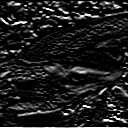

Horizontal


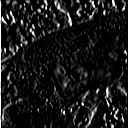

In [0]:
def prewitt_filter(img, size):
  H, W = img.shape

  pad = size // 2
  out_v = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
  out_v[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
  out_h = out_v.copy()

  K_v = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
  K_h = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]

  tmp= out_v.copy()

  for y in range(H):
    for x in range(W):
      out_v[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K_v).sum()
      out_h[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K_h).sum()

  out_v = np.clip(out_v, 0, 255)
  out_h = np.clip(out_h, 0, 255)

  out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
  out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)

  return (out_v, out_h)

img = cv2.imread("imori.jpg")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out_v, out_h = prewitt_filter(im_gray, 3)
print("Vertical")
cv2_imshow(out_v)
print("Horizontal")
cv2_imshow(out_h)

## Q17 Laplacianフィルタ

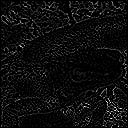

In [5]:
def laplacian_filter(img, size):
  H, W = img.shape

  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

  K = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

  tmp = out.copy()

  for y in range(H):
    for x in range(W):
      out[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K).sum()

  out = np.clip(out, 0, 255)

  out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

  return out

img = cv2.imread("imori.jpg")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = laplacian_filter(im_gray, 3)
cv2_imshow(out)

Q18 Emboss フィルタ

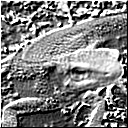

In [6]:
def emboss_filter(img, size):
  H, W = img.shape

  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

  K = [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]

  tmp = out.copy()

  for y in range(H):
    for x in range(W):
      out[pad + y, pad + x] = np.multiply(tmp[y: y + size, x: x + size], K).sum()

  out = np.clip(out, 0, 255)

  out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

  return out

img = cv2.imread("imori.jpg")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = emboss_filter(im_gray, 3)
cv2_imshow(out)

Q19 LoGフィルタ

Gaussian -> Laplacian

Gaussian: 

$$ g(x,y,\sigma) = 1/ (2 * \pi * \sigma * \sigma) * \exp( - (x^2 + y^2) / (2*\sigma^2)) $$

Log

$$ LoG(x,y) = (x^2 + y^2 - \sigma^2) / (2 * \pi * \sigma^6) * \exp(-(x^2+y^2) / (2* \sigma^2)) $$


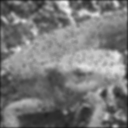

In [11]:
def log_filter(img, size=5, sigma=3):
  H, W = img.shape
  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
  out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
  K = np.zeros((size, size), dtype=np.float)
  for x in range(-pad, -pad + size):
    for y in range(-pad, -pad + size):
      K[x + pad, y + pad] = (x**2 + y**2 - sigma**2) * np.exp(-(x**2 + y**2) / (2 * (sigma**2)))
  K /= (2 * np.pi * (sigma**6))
  K /= K.sum()

  tmp = out.copy()

  for x in range(H):
    for y in range(W):
      out[x + pad, y + pad] = np.multiply(tmp[x:(x + size), y:(y + size)], K).sum()
  
  out = np.clip(out, 0, 255)

  return out[pad:(pad + H), pad:(pad + W)].astype(np.uint8)

img = cv2.imread("imori_noise.jpg")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = log_filter(im_gray)
cv2_imshow(out)

## Q20 ヒストグラム表示

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

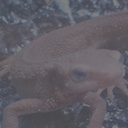

In [13]:
img_dark = cv2.imread("imori_dark.jpg")
cv2_imshow(img_dark)

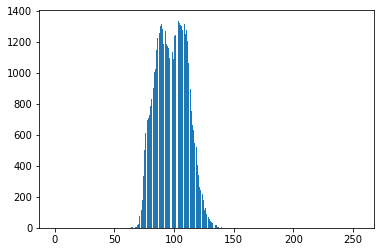

In [22]:
n, bin, patches = plt.hist(img_dark.flatten(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

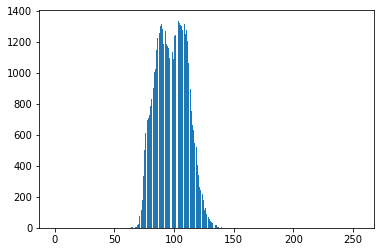

In [28]:
img = cv2.imread("imori_dark.jpg").astype(np.float)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()